In [11]:
from sklearn.feature_extraction import DictVectorizer #DictVectorizer class can be 
                                                    #used to one-hot encode
                                                    #categorical features
onehot_encoder = DictVectorizer()
instances = [
{'city': 'New York'},
{'city': 'San Francisco'},
{'city': 'Chapel Hill'} ]
print onehot_encoder.fit_transform(instances).toarray()


[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


Categorical variables are commonly encoded using one-of-K or one-hot encoding, in which the explanatory variable is encoded using one binary feature for each of the variable's possible values.
Note that resulting features will not necessarily be ordered in the feature vector as they were encountered. In the first training example, the city feature's value is New York. The second element in the feature vectors corresponds to the New York value and is set to 1 for the first instance.

In [3]:
corpus = [
            'UNC played Duke in basketball',
            'Duke lost the basketball game',
'I ate a sandwich']
#A corpus is a collection of documents
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{u'duke': 2, u'basketball': 1, u'lost': 5, u'played': 6, u'in': 4, u'game': 3, u'sandwich': 7, u'unc': 9, u'ate': 0, u'the': 8}


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances


### The bag-of-words representation

It creates one feature for each word of interest in the text. The bag-of-words model is motivated by the intuition that documents containing similar words often have similar meanings. The bag-of-words model can be used effectively for document classification and retrieval despite the limited information that it encodes.
The corpus's unique words comprise its vocabulary. The number of elementsthat comprise a feature vector is called the vector's dimension. A dictionary maps the vocabulary to indices in the feature vector.
The CountVectorizer class can produce a bag-of-words representation from a string or file. By default, CountVectorizer converts the characters in the documents to lowercase, and tokenizes the documents.
Tokenization is the process of splitting a string into tokens, or meaningful sequences of characters. Tokens frequently are words, but they may also be shorter sequences including punctuation characters and affixes. The CountVectorizer class tokenizes using a regular expression that splits strings on whitespace and extracts sequences of characters that are two or more characters in length.

In [13]:
from sklearn.metrics.pairwise import euclidean_distances
counts = [
            [0, 1, 1, 0, 0, 1, 0, 1],
            [0, 1, 1, 1, 1, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 1, 0]
            ]
print 'Distance between 1st and 2nd documents:', euclidean_distances(counts[0], counts[1])
print 'Distance between 1st and 3rd documents:', euclidean_distances(counts[0], counts[2])
print 'Distance between 2nd and 3rd documents:', euclidean_distances(counts[1], counts[2])

Distance between 1st and 2nd documents: [[ 2.]]
Distance between 1st and 3rd documents: [[ 2.44948974]]
Distance between 2nd and 3rd documents: [[ 2.44948974]]


/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/

Euclidean distance ^ 

In [16]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
corpus = [
            'I am gathering ingredients for the sandwich.',
            'There were many wizards at the gathering.'
            ]
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print lemmatizer.lemmatize('gathering', 'v')
print lemmatizer.lemmatize('gathering', 'n')

gather
gathering


In [18]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print stemmer.stem('gathering')

gather


In [20]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
wordnet_tags = ['n', 'v']
corpus = [
            'He ate the sandwiches',
            'Every sandwich was eaten by him'
        ]
stemmer = PorterStemmer()
print 'Stemmed:', [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus]
def lemmatize(token, tag):
    if tag[0].lower() in ['n', 'v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token
lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
print 'Lemmatized:', [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus]

Stemmed: [['He', 'ate', 'the', u'sandwich'], [u'everi', 'sandwich', u'wa', 'eaten', 'by', 'him']]
Lemmatized: [['He', u'eat', 'the', u'sandwich'], ['Every', 'sandwich', u'be', u'eat', 'by', 'him']]


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['The dog ate a sandwich, the wizard transfigured a sandwich, and I ate a sandwich']
vectorizer = CountVectorizer(stop_words='english')
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_

[[2 1 3 1 1]]
{u'sandwich': 2, u'wizard': 4, u'dog': 1, u'transfigured': 3, u'ate': 0}


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
            'The dog ate a sandwich and I ate a sandwich',
            'The wizard transfigured a sandwich'
            ]
vectorizer = TfidfVectorizer(stop_words='english')
print vectorizer.fit_transform(corpus).todense()

[[ 0.75458397  0.37729199  0.53689271  0.          0.        ]
 [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]


In [26]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = ['the', 'ate', 'bacon', 'cat']
vectorizer = HashingVectorizer(n_features=6)
print vectorizer.transform(corpus).todense()

[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


In [27]:
from sklearn import datasets
digits = datasets.load_digits()
print 'Digit:', digits.target[0]
print digits.images[0]
print 'Feature vector:\n', digits.images[0].reshape(-1, 64)

Digit: 0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
Feature vector:
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]


In [1]:
from sklearn import preprocessing
import numpy as np
X = np.array([
        [0., 0., 5., 13., 9., 1.],
        [0., 0., 13., 15., 10., 15.],
        [0., 3., 15., 2., 0., 11.]
        ])
print preprocessing.scale(X)

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]


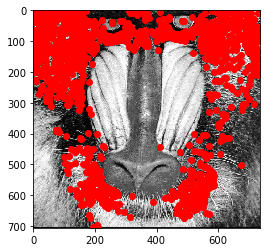

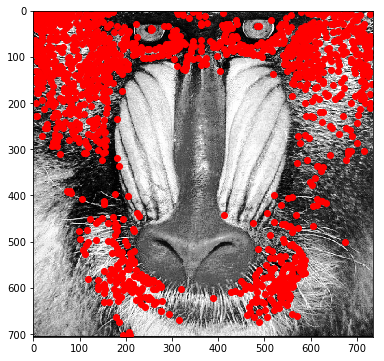

In [2]:
import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage.io as io
import os
from skimage.exposure import equalize_hist
mjpg = open(os.path.expanduser("~/Documents/mandrill.jpg"))
def show_corners(corners, image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()
    
mandrill = io.imread(mjpg)
mandrill = equalize_hist(rgb2gray(mandrill))
corners = corner_peaks(corner_harris(mandrill), min_distance=2)
show_corners(corners, mandrill)